# NAVIER-STOKES EQUATIONS SIMPLIFIER (NSES):
**Note:** Unfortunatelly, this program has to be run carefully cell by cell to ensure that you have completed each task. Missing any cell, or entering any unwanted input, means that you have to repeat running the code from beginning! This is the main flaw of this program.

**Note:** the numerical calculation and plots at the end of the notebook are only available for the case of: Steady, inviscid, 1D flow. So to be able to use this feature you can have the assumption of steadiness, not-viscous, and one-dimensional flow.

**Description about the Notebook:**

This notebook will be divided into four parts:


**1) Developing the local form of NS equations :** This first part includes the code used to develop the local form of the Navier-Stokes equations by using sympy library which allows the program to transfer the input code to mathematical symbols.

**2) Simplifying the NS equations:** In the second part we use Widgets library. This part includes 4 tasks, in each task the user is allowed to choose a consideration.

    2.1) Task 1: Steady or Unsteady flow
    
    2.2) Task 2: Viscous or Inviscid flow
    
    2.3) Task 3: Spatial Dimensions: 1D, 2D, 3D with axes x, y, and z
    
    2.4) Task 4: Uniform flow on the chosen axes.
    
   In each task, the program will simplify the Navier-Stokes equations regarding the consideration chosen by the user.
   
**3) Choosing initial and boundary condition:** The user will be able to define the forces included, boundary conditions, fluid properties, and known values in his problem.

**4) Numerical Analysis of simplified NS equations:** This part includes simple numerical simulation of some simplified forms of the equations; such as: caluclating the unknown pressure or velocity in 1D flow. Also simple plots will be performed.

**Note:** This program consider the **incompressible case** of Navier-Stokes equation for simplicity.

In [1]:
#Importing the Libraries:

In [2]:
from sympy import *
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Developping the Navier-Stokes equations:

**Defining our symbols and terms:**

Here we define several symbols and terms that will be gathered to develop the Navier-Stokes equations.

The **symbols** are respectively:

1) Spatial components: x, y, and z

2) Velocity components: u, v, and w for x,y, and z respectively

3) Temporal component: The time t

4) Pressure P

5) Internal forces on x, y, and z axes: Usually includes the gravity force, magnatic force, ...etc

6) Density of the fluid

7) The Dynamic Viscosity of the fluid

**Terms** in **Left Hand Side** are:

1) Temporal Term

2) Inertial Term

**Terms** in **Right Hand Side** are:

1) Pressure Gradient

2) Viscous Term

3) Internal (or Volume) Force Term: including gravity force, magnatic force, etc...

In [3]:
# Symbols
x, y, z = symbols('x y z')
u, v, w = symbols ('u v w')
t = symbols('t')
P = symbols('P')
Fx = symbols('F_x')
Fy = symbols('F_y')
Fz = symbols('F_z')
Density = symbols('\u03C1')
Dyn_Viscosity = symbols('\u03BC')
p1 = symbols('p_1')
p0 = symbols('p_0')
U1 = symbols('U_1', positive = True)
U0 = symbols('U_0', positive = True)
V1 = symbols('V_1', positive = True)
V0 = symbols('V_0', positive = True)
W1 = symbols('W_1', positive = True)
W0 = symbols('W_0', positive = True)
#Defining the temporal terms:
XTemp_Term = (Density * Derivative(u,t))
YTemp_Term = (Density * Derivative(v,t))
ZTemp_Term = (Density * Derivative(w,t))
#Defining the Inertial Terms:
#spatial derivative of velocity
u_x = Derivative(u,x)
u_y = Derivative(u,y)
u_z = Derivative(u,z)
v_x = Derivative(v,x)
v_y = Derivative(v,y)
v_z = Derivative(v,z)
w_x = Derivative(w,x)
w_y = Derivative(w,y)
w_z = Derivative(w,z)
#Advective components:
u_u_x = u * u_x
v_u_y = v * u_y
w_u_z = w * u_z
u_v_x = u * v_x
v_v_y = v * v_y
w_v_z = w * v_z
u_w_x = u * w_x
v_w_y = v * w_y
w_w_z = w * w_z
#Inertial Term
XInertial_Term = Density * (u_u_x + v_u_y + w_u_z)
YInertial_Term = Density * (u_v_x + v_v_y + w_v_z)
ZInertial_Term = Density * (u_w_x + v_w_y + w_w_z)
#The Left Hand Side (LHS) of Navier-Stokes Equations:
#The Left hand side in Navier-Stokes equations usually includes the Inertial Terms and the Temporal Terms:
XLHS = XTemp_Term + XInertial_Term
YLHS = YTemp_Term + YInertial_Term
ZLHS = ZTemp_Term + ZInertial_Term
#Defining the External forces terms acting on the surface of the fluid element:
#Pressure Gradient Term
XPressure_Term = - Derivative(P, x)
YPressure_Term = - Derivative(P, y)
ZPressure_Term = - Derivative(P, z)
#Viscous Terms:
XViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u, y, 2) + Derivative(u,z,2))
YViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v, y, 2) + Derivative(v,z,2))
ZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w, y, 2) + Derivative(w,z,2))
#Defining the internal forces:
#Including gravity force, magnetic force, etc...
XInternal_Force_Term = Fx 
YInternal_Force_Term = Fy 
ZInternal_Force_Term = Fz 
#Components of gravity acceleration:
g = symbols("g")
g_x = symbols("g_x")
g_y = symbols("g_y")
g_z = symbols("g_z")
#Inclination angle:
Alpha = symbols("\u03B1")
#The Right Hand Side (RHS) of the Navier-Stokes equations:
#The RHS of the Navier-Stokes equations includes the Internal forces and the External forces:
XRHS = XPressure_Term + XViscous_Term + XInternal_Force_Term
YRHS = YPressure_Term + YViscous_Term + YInternal_Force_Term
ZRHS = ZPressure_Term + ZViscous_Term + ZInternal_Force_Term

# The General Form of the Navier-Stokes Equations (incompressible case):

In [4]:
XNSeq = Eq(XLHS, XRHS)
YNSeq = Eq(YLHS, YRHS)
ZNSeq = Eq(ZLHS, ZRHS)

In [5]:
XNSeq

Eq(ρ*(u*Derivative(u, x) + v*Derivative(u, y) + w*Derivative(u, z)) + ρ*Derivative(u, t), F_x + μ*(Derivative(u, (x, 2)) + Derivative(u, (y, 2)) + Derivative(u, (z, 2))) - Derivative(P, x))

In [6]:
YNSeq

Eq(ρ*(u*Derivative(v, x) + v*Derivative(v, y) + w*Derivative(v, z)) + ρ*Derivative(v, t), F_y + μ*(Derivative(v, (x, 2)) + Derivative(v, (y, 2)) + Derivative(v, (z, 2))) - Derivative(P, y))

In [7]:
ZNSeq

Eq(ρ*(u*Derivative(w, x) + v*Derivative(w, y) + w*Derivative(w, z)) + ρ*Derivative(w, t), F_z + μ*(Derivative(w, (x, 2)) + Derivative(w, (y, 2)) + Derivative(w, (z, 2))) - Derivative(P, z))

# Part 2: Definition of the flow conditions and simplification of the General N-S equations:

To simplify the **Navier-Stokes equations**, you have several tasks to pass.
In each task you have a checkbox with a question above and an explanation, kindly fell free to choose your required answer in each task. The program will progressively follow your reccomondations and simplify the N-S equations as you wish!

Enjoy!

## Task 1: Steadiness

The steadiness defines if the flow parameters change with time or not. If you choose to have a steady flow, the time derivative terms will be eliminated. It is easier to work with steady flow because unsteady case cannot be treated easily and requires advanced statistical theories.

Do you want to work with a Steady flow? if yes, do not hesitate to check the checkbox and to Run the code below!

In [8]:
steadiness_checkbox = widgets.Checkbox(
    value = False,
    description = 'Steady',
    disabled = False
)

steadiness_checkbox

Checkbox(value=False, description='Steady')

In [9]:
Steadiness = steadiness_checkbox.value
if Steadiness == True:
    print("The time derivative terms are well eliminated from the Navier-Stokes equations!")
    nXLHS = Density * (u_u_x + v_u_y + w_u_z)
    nYLHS = Density * (u_v_x + v_v_y + w_v_z)
    nZLHS = Density * (u_w_x + v_w_y + w_w_z)
if Steadiness == False:
    print("The time derivative terms are kept in the Navier-Stokes equations")
    nXLHS = XLHS
    nYLHS = YLHS
    nZLHS = ZLHS
nXNSeq= Eq(nXLHS, XRHS)
nYNSeq= Eq(nYLHS, YRHS)
nZNSeq= Eq(nZLHS, ZRHS)

The time derivative terms are well eliminated from the Navier-Stokes equations!


**Results of task 1:**

In [10]:
nXNSeq

Eq(ρ*(u*Derivative(u, x) + v*Derivative(u, y) + w*Derivative(u, z)), F_x + μ*(Derivative(u, (x, 2)) + Derivative(u, (y, 2)) + Derivative(u, (z, 2))) - Derivative(P, x))

In [11]:
nYNSeq

Eq(ρ*(u*Derivative(v, x) + v*Derivative(v, y) + w*Derivative(v, z)), F_y + μ*(Derivative(v, (x, 2)) + Derivative(v, (y, 2)) + Derivative(v, (z, 2))) - Derivative(P, y))

In [12]:
nXNSeq

Eq(ρ*(u*Derivative(u, x) + v*Derivative(u, y) + w*Derivative(u, z)), F_x + μ*(Derivative(u, (x, 2)) + Derivative(u, (y, 2)) + Derivative(u, (z, 2))) - Derivative(P, x))

## Task 2: Viscosity

Inviscid flows are theoretical cases that neglect the viscous effect; however this assumption is not realistic. Fluids in nature have viscosity, which is the shearing effect caused by a fluid molecule on its neighbor molecules.Viscosity is important for turbulent flow problems. Also, for a flow around a solid body, viscosity affects the flow separation.

If you are considering an inviscid case do not check the checkbox, the viscous terms will be eliminated from the Navier-Stokes equations.

In [13]:
print("Are you working with a viscous flow? if yes please check the checkbox.")
Viscous_flow_checkbox = widgets.Checkbox(
    value = False,
    description = 'Viscous',
    disabled = False
)
Viscous_flow_checkbox


Are you working with a viscous flow? if yes please check the checkbox.


Checkbox(value=False, description='Viscous')

In [14]:
Viscous_flow = Viscous_flow_checkbox.value

if Viscous_flow == False:
    print("You chose to work with inviscid flow, the viscous terms are well eliminated from the Navier-Stokes equations!")
    nXRHS = XPressure_Term + XInternal_Force_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
if Viscous_flow == True:
    print("You chose to work with viscous flow, the viscous term are kept in the Navier-Stokes equations!")
    nXRHS = XRHS
    nYRHS = YRHS
    nZRHS = ZRHS
nXNSeq= Eq(nXLHS, nXRHS)
nYNSeq= Eq(nYLHS, nYRHS)
nZNSeq= Eq(nZLHS, nZRHS)

You chose to work with inviscid flow, the viscous terms are well eliminated from the Navier-Stokes equations!


**Results of Task 2:**

In [15]:
nXNSeq

Eq(ρ*(u*Derivative(u, x) + v*Derivative(u, y) + w*Derivative(u, z)), F_x - Derivative(P, x))

In [16]:
nYNSeq

Eq(ρ*(u*Derivative(v, x) + v*Derivative(v, y) + w*Derivative(v, z)), F_y - Derivative(P, y))

In [17]:
nZNSeq

Eq(ρ*(u*Derivative(w, x) + v*Derivative(w, y) + w*Derivative(w, z)), F_z - Derivative(P, z))

## Task 3: Number of Dimensions

It is essential to define on which axes the fluid is flowing when working in a fluid problem. 1D flow is a simple case in which the fluid flow in one axis, thus the velocities, and their derivatives, on other axes are neglected. Also in two-directional flow (2D flow) we can elminate the third axis in which we do not have flow motion.

Three-directional flows are complicated!

Run the code below and select the number of dimensions: **(To have the accessability to use the simple numerical simulation at the end of the notebook, choose the 1D case)**

In [18]:
print("Please select the number of dimensions in your problem:")
Nbre_Dimensions = widgets.RadioButtons(
    options = ['1D', '2D', '3D'],
    description = 'Dimensions:',
    disabled = False,
)
Nbre_Dimensions

Please select the number of dimensions in your problem:


RadioButtons(description='Dimensions:', options=('1D', '2D', '3D'), value='1D')

In the cell below you have to choose the axis, or the axes, included in your problem. The spatial axes are x, y, and z. 

For 1D flow, you have to choose only one of these three axes, simply type x, y, or z in the **textbox.**

For 2D flow you have three options: xy, xz, or yz axes. simply type them in the textbox.

For 3D flow you have only one option which is: xyz

In [23]:
if Nbre_Dimensions.value == '1D':
    print("Now you are working with a 1D flow, choose the axis on which you have flow motion:")
    D_axis = widgets.Combobox(
        placeholder = 'Choose your axis:',
        options = ['x', 'y', 'z'],
        description = 'axis:',
        ensure_option = True,
        disabled = False
    )
if Nbre_Dimensions.value == '2D':
    print("Now you are working with a 2D flow, choose the axes on which you have flow motion:")
    D_axis = widgets.Combobox(
        placeholder = 'Choose your axes:',
        options = ['xy', 'yz', 'xz'],
        description = 'axes:',
        ensure_option = True,
        disabled = False
    )
if Nbre_Dimensions.value == '3D':
    print("Now you are working with a 3D flow, you have only one option!")
    D_axis = widgets.Combobox(
        placeholder = 'Only one option:',
        options = ['xyz'],
        description = 'axes:',
        ensure_option = True,
        disabled = False
    )
D_axis

Now you are working with a 1D flow, choose the axis on which you have flow motion:


Combobox(value='', description='axis:', ensure_option=True, options=('x', 'y', 'z'), placeholder='Choose your …

In [24]:
#1D Flow Case:
#Flow on x axis only:
if D_axis.value == 'x' and Steadiness == True and Viscous_flow == False:
    print("Only x axis is included.")
    print("Hence velocities v and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * ((u_u_x))
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = 0
    nZLHS = 0
    nXRHS = XPressure_Term + XInternal_Force_Term
    nYRHS = YInternal_Force_Term
    nZRHS = ZInternal_Force_Term
if D_axis.value == 'x' and Steadiness == False and Viscous_flow == False:    
    print("Only x axis is included.")
    print("Hence velocities v and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * ((u_u_x))
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nYLHS = 0
    nZLHS = 0
    nXRHS = XPressure_Term + XInternal_Force_Term
    nYRHS = YInternal_Force_Term
    nZRHS = ZInternal_Force_Term 
if D_axis.value == 'x' and Steadiness == False and Viscous_flow == True: 
    print("Only x axis is included.")
    print("Hence velocities v and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * ((u_u_x))
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYViscous_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nYLHS = 0
    nZLHS = 0
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
if D_axis.value == 'x' and Steadiness == True and Viscous_flow == True: 
    print("Only x axis is included.")
    print("Hence velocities v and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * ((u_u_x))
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYViscous_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#Flow on y axis only:
if D_axis.value == 'y' and Steadiness == True and Viscous_flow == False:
    print("Only y axis is included.")
    print("Hence velocities u and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = Density * ((v_v_y))
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term
    nZLHS = nZInertial_Term
    nXRHS = XInternal_Force_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZRHS = ZInternal_Force_Term
if D_axis.value == 'y' and Steadiness == False and Viscous_flow == False:    
    print("Only y axis is included.")
    print("Hence velocities u and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = Density * ((v_v_y))
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nZLHS = nZInertial_Term 
    nXRHS = XInternal_Force_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZRHS = ZInternal_Force_Term
if D_axis.value == 'y' and Steadiness == False and Viscous_flow == True: 
    print("Only y axis is included.")
    print("Hence velocities u and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = Density * ((v_v_y))
    nZInertial_Term = 0
    nXViscous_Term = 0
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2))
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nZLHS = nZInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
if D_axis.value == 'y' and Steadiness == True and Viscous_flow == True: 
    print("Only y axis is included.")
    print("Hence velocities u and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = Density * ((v_v_y))
    nZInertial_Term = 0
    nXViscous_Term = 0
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2))
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#Flow on z axis only:*
if D_axis.value == 'z' and Steadiness == True and Viscous_flow == False:
    print("Only z axis is included.")
    print("Hence velocities u and v are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = Density * ((w_w_z))
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term
    nZLHS = nZInertial_Term
    nXRHS = XInternal_Force_Term
    nYRHS = YInternal_Force_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
if D_axis.value == 'z' and Steadiness == False and Viscous_flow == False:    
    print("Only z axis is included.")
    print("Hence velocities u and v are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = Density * ((w_w_z))
    nXLHS = nXInertial_Term
    nYLHS = nYInertial_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nXRHS = XInternal_Force_Term
    nYRHS = YInternal_Force_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
if D_axis.value == 'z' and Steadiness == False and Viscous_flow == True: 
    print("Only z axis is included.")
    print("Hence velocities u and v are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = Density * ((w_w_z))
    XViscous_Term = 0
    YViscous_Term = 0
    ZViscous_Term = Dyn_Viscosity * (Derivative(w,z,2))
    nXLHS = nXInertial_Term
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nXRHS = nXViscous_Term + XInternal_Force_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
if D_axis.value == 'z' and Steadiness == True and Viscous_flow == True: 
    print("Only z axis is included.")
    print("Hence velocities u and v are neglected and each term containing them will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = Density * ((w_w_z))
    nXViscous_Term = 0
    nYViscous_Term = 0
    nZViscous_Term = Dyn_Viscosity * (Derivative(w,z,2))
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#2D Flow:
#Flow on x and y axes:
if D_axis.value == 'xy' and Steadiness == True and Viscous_flow == False:
    print("x and y axes are included:")
    print("Hence velocity w is neglected and each term containing it will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term
    nZLHS = nZInertial_Term
    nXRHS = XPressure_Term + XInternal_Force_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZRHS = ZInternal_Force_Term
if D_axis.value == 'xy' and Steadiness == False and Viscous_flow == False:    
    print("x and y axes are included:")
    print("Hence velocity w is neglected and each term containing it will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nZInertial_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nZLHS = nZInertial_Term 
    nXRHS = XPressure_Term +  XInternal_Force_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZRHS = ZInternal_Force_Term
if D_axis.value == 'xy' and Steadiness == False and Viscous_flow == True: 
    print("x and y axes are included:")
    print("Hence velocity w is neglected and each term containing it will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nZInertial_Term = 0
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u, y, 2))
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v, y, 2))
    nZViscous_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nZLHS = nZInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
if D_axis.value == 'xy' and Steadiness == True and Viscous_flow == True: 
    print("x and y axes are included")
    print("Hence velocity w is neglected and each term containing it will be eliminated from the Navier-Stokes equations")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nZInertial_Term = 0
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u, y, 2))
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v, y, 2))
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#Flow on x and z axes:
if D_axis.value == 'xz' and Steadiness == True and Viscous_flow == False:
    print("x and z axes are included")
    print("Hence velocity v is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nYInertial_Term = 0
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term
    nZLHS = nZInertial_Term
    nXRHS = XPressure_Term + XInternal_Force_Term
    nYRHS = YInternal_Force_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
if D_axis.value == 'xz' and Steadiness == False and Viscous_flow == False:    
    print("x and z axes are included")
    print("Hence velocity v is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nYInertial_Term = 0
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nXLHS = nXInertial_Term + XTemp_Term
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nXRHS = XPressure_Term +  XInternal_Force_Term
    nYRHS = YInternal_Force_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
if D_axis.value == 'xz' and Steadiness == False and Viscous_flow == True: 
    print("x and z axes are included")
    print("Hence velocity v is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nYInertial_Term = 0
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u,z,2))
    nYViscous_Term = 0
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term + XTemp_Term
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
if D_axis.value == 'xz' and Steadiness == True and Viscous_flow == True: 
    print("x and z axes are included")
    print("Hence velocity v is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nYInertial_Term = 0
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u,z,2))
    nYViscous_Term = 0
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#Flow on y and z axes:
if D_axis.value == 'yz' and Steadiness == True and Viscous_flow == False:
    print("y and z axes are included")
    print("Hence velocity u is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = 0
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term
    nZLHS = nZInertial_Term
    nXRHS = XInternal_Force_Term
    nYRHS = XPressure_Term + YInternal_Force_Term
    nZRHS = XPressure_Term + ZInternal_Force_Term
if D_axis.value == 'yz' and Steadiness == False and Viscous_flow == False:    
    print("y and z axes are included")
    print("Hence velocity u is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = 0
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nXRHS = XInternal_Force_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
if D_axis.value == 'yz' and Steadiness == False and Viscous_flow == True: 
    print("y and z axes are included")
    print("Hence velocity u is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = 0
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nXViscous_Term = 0
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2) + Derivative(v,z,2))
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, y, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nXRHS = nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
if D_axis.value == 'yz' and Steadiness == True and Viscous_flow == True: 
    print("y and z axes are included")
    print("Hence velocity u is neglected and each term containing it will be eliminated from the Navier-Stokes equations.")
    nXInertial_Term = 0
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nXViscous_Term = 0
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2) + Derivative(v,z,2))
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, y, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term 
    nYLHS = nYInertial_Term 
    nZLHS = nZInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term
    nYRHS = YPressure_Term  + nYViscous_Term + YInternal_Force_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#3D Flow:
if D_axis.value == 'xyz':
    nXLHS = nXLHS
    nYLHS = nYLHS
    nZLHS = nZLHS
    nXRHS = nXRHS
    nXRHS = nXRHS
    nXRHS = nXRHS
nXNSeq = Eq(nXLHS, nXRHS)
nYNSeq = Eq(nYLHS, nYRHS)
nZNSeq = Eq(nZLHS, nZRHS)

Only x axis is included.
Hence velocities v and w are neglected and each term containing them will be eliminated from the Navier-Stokes equations


**Results of task 3:**

In [25]:
nXNSeq

Eq(u*ρ*Derivative(u, x), F_x - Derivative(P, x))

In [26]:
nYNSeq

Eq(0, F_y)

In [27]:
nZNSeq

Eq(0, F_z)

## Task 4: Uniform Flow

A flow is said to be uniform on a certain axis if its velocity do not change over this axis, i.e. if the flow is uniform on an axis, the derivative of each velocity component over this axis is neglected.

Fell free to choose the axes on which you are considering the uniform assumption (uncheck the not required axes):

In [28]:
Xuniform_checkbox = widgets.Checkbox(
    value = True,
    description = 'uniform x',
    disabled = False
)
Yuniform_checkbox = widgets.Checkbox(
    value = True,
    description = 'uniform y',
    disabled = False
)
Zuniform_checkbox = widgets.Checkbox(
    value = True,
    description = 'uniform z',
    disabled = False
)
Xuniform_checkbox

Checkbox(value=True, description='uniform x')

In [29]:
Yuniform_checkbox

Checkbox(value=True, description='uniform y')

In [30]:
Zuniform_checkbox

Checkbox(value=True, description='uniform z')

In [31]:
#Uniform flow for three dimensional case:
#3D case with uniform flow on x axis only:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y + w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, y, 2) + Derivative(u,z,2))
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2) + Derivative(v,z,2))
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, y, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = Density * (v_u_y + w_u_z)
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#Steady case:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y + w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, y, 2) + Derivative(u,z,2))
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2) + Derivative(v,z,2))
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, y, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = Density * (v_u_y + w_u_z)
    nYInertial_Term = Density * (v_v_y + w_v_z)
    nZInertial_Term = Density * (v_w_y + w_w_z)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#3D case with uniform flow on y axis only:
#Unsteady case
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u,z,2))
    nYInertial_Term = Density * (u_v_x + w_v_z)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v,z,2))
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nYInertial_Term = Density * (u_v_x + w_v_z)
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation over y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u,z,2))
    nYInertial_Term = Density * (u_v_x + w_v_z)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v,z,2))
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w,z,2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x + w_u_z)
    nYInertial_Term = Density * (u_v_x + w_v_z)
    nZInertial_Term = Density * (u_w_x + w_w_z)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#3D case with uniform flow on z axis only:
#Unsteady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u,y,2))
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v,y,2))
    nZInertial_Term = Density * (u_w_x + v_w_y)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w,y,2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nZInertial_Term = Density * (u_w_x + v_w_y)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#steady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2) + Derivative(u,y,2))
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2) + Derivative(v,y,2))
    nZInertial_Term = Density * (u_w_x + v_w_y)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2) + Derivative(w,y,2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x + v_u_y)
    nYInertial_Term = Density * (u_v_x + v_v_y)
    nZInertial_Term = Density * (u_w_x + v_w_y)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#3D case with Uniform flow **on x and y axes only:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivatives on x and y axes area eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, z, 2))
    nYInertial_Term = Density * (w_v_z)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, z, 2))
    nZInertial_Term = Density * (w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, z, 2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives on x and y axes area eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (w_u_z)
    nYInertial_Term = Density * (w_v_z)
    nZInertial_Term = Density * (w_w_z)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#steady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivatives on x and y axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, z, 2))
    nYInertial_Term = Density * (w_v_z)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, z, 2))
    nZInertial_Term = Density * (w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, z, 2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivatives on x and y axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (w_u_z)
    nYInertial_Term = Density * (w_v_z)
    nZInertial_Term = Density * (w_w_z)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#3D case with Uniform flow on x and z axes only:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivatives on x and z axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, y, 2))
    nYInertial_Term = Density * (v_v_y)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2))
    nZInertial_Term = Density * (v_w_y)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, y, 2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives on x and z axes area eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y)
    nYInertial_Term = Density * (v_v_y)
    nZInertial_Term = Density * (v_w_y)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivatives on x and z axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, y, 2))
    nYInertial_Term = Density * (v_v_y)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2))
    nZInertial_Term = Density * (v_w_y)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, y, 2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivatives on x and z axes area eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y)
    nYInertial_Term = Density * (v_v_y)
    nZInertial_Term = Density * (v_w_y)
    nXLHS = nXInertial_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#3D case with Uniform flow **on y and z axes only:
#Unsteady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivatives on y and z axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYInertial_Term = Density * (u_v_x)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2))
    nZInertial_Term = Density * (u_w_x)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives on y and z axes area eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nYInertial_Term = Density * (u_v_x)
    nZInertial_Term = Density * (u_w_x)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivatives on y and z axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYInertial_Term = Density * (u_v_x)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2))
    nZInertial_Term = Density * (u_w_x)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives on y and z axes area eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nYInertial_Term = Density * (u_v_x)
    nZInertial_Term = Density * (u_w_x)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#3D case with uniform flow on x,y, and z axes:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivatives on x, y and z axes are eliminated from inertial terms and viscous terms.")
    nXLHS = XTemp_Term
    nXRHS = XPressure_Term + XInternal_Force_Term 
    nYLHS = YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and D_axis.value == 'xyz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives on x,y and z axes area eliminated from inertial terms.")
    nXLHS = XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = ZTemp_Term
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivatives on x, y and z axes are eliminated from inertial terms and viscous terms.")
    nXLHS = 0
    nXRHS = XPressure_Term + XInternal_Force_Term 
    nYLHS = 0
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = 0
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and D_axis.value == 'xyz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivatives on x,y and z axes area eliminated from inertial terms.")
    nXLHS = 0
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = 0
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = 0
    nZRHS = ZPressure_Term + ZInternal_Force_Term
#Uniform flow for two dimensional case:
#2D(x,y) case with uniform flow on x axis only:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, y, 2))
    nYInertial_Term = Density * (v_v_y)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2))
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = Density * (v_u_y)
    nYInertial_Term = Density * (v_v_y)
    nZInertial_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (v_u_y)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, y, 2))
    nYInertial_Term = Density * (v_v_y)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, y, 2))
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = Density * (v_u_y)
    nYInertial_Term = Density * (v_v_y)
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#2D(x,y) case with uniform flow on **y axis only:
#Unsteady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYInertial_Term = Density * (u_v_x)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2))
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x)
    nYInertial_Term = Density * (u_v_x)
    nZInertial_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYInertial_Term = Density * (u_v_x)
    nYViscous_Term = Dyn_Viscosity * (Derivative(v, x, 2))
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == False and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x)
    nYInertial_Term = Density * (u_v_x)
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#2D(x,y) case with uniform flow **on x and y axes:
#Unsteady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivatives on x and y are eliminated from inertial terms and viscous terms.")
    nXLHS = XTemp_Term
    nXRHS = XPressure_Term + XInternal_Force_Term 
    nYLHS = YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = 0
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives on x and y are eliminated from the inertial terms")
    nXLHS = XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = 0
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#Steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Xuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xy'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivatives on x and y are eliminated from inertial terms and viscous terms.")
    nXLHS = 0
    nXRHS = XPressure_Term + XInternal_Force_Term 
    nYLHS = 0
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = 0
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and D_axis.value == 'xy' and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivatives on x and y are eliminated from the inertial terms")
    nXLHS = 0
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = 0
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = 0
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#2D(x,z) case with uniform flow on x only:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, z, 2))
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = Density * (w_w_z)
    nZViscous_Term = Dyn_Viscosity(Derivative(w, z, 2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = Density * (w_u_z)
    nYInertial_Term = 0
    nZInertial_Term = Density * (w_w_z)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#Steady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (w_u_z)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, z, 2))
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = Density * (w_w_z)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, z, 2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and Zuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = Density * (w_u_z)
    nYInertial_Term = 0
    nZInertial_Term = Density * (w_w_z)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#2D(x,z) case with uniform flow on z only:
#Unsteady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = Density * (u_w_x)
    nZViscous_Term = Dyn_Viscosity(Derivative(w, x, 2))
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x)
    nYInertial_Term = 0
    nZInertial_Term = Density * (u_w_x)
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#Steady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = Density * (u_u_x)
    nXViscous_Term = Dyn_Viscosity * (Derivative(u, x, 2))
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = Density * (u_w_x)
    nZViscous_Term = Dyn_Viscosity * (Derivative(w, x, 2))
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = Density * (u_u_x)
    nYInertial_Term = 0
    nZInertial_Term = Density * (u_w_x)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#2D(x,z) with uniform flow on x and z axes:
#Unsteady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == True  and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivations on x and z axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivations over x and z axes are eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivations on x and z axes are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Xuniform_checkbox.value == True and Yuniform_checkbox.value == False and D_axis.value == 'xz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivations over x and z axes are eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#2D(y,z) with uniform flow on y only:
#Unsteady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = Density * (w_v_z)
    nYViscous_Term = Dyn_Viscosity(Derivative(v, z, 2))
    nZInertial_Term = Density * (w_w_z)
    nZViscous_Term = Dyn_Viscosity(Derivative(w, z, 2))
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = Density * (w_v_z)
    nZInertial_Term = Density * (w_w_z)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term + ZPressure_Term 
#Steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = Density * (w_v_z)
    nYViscous_Term = Dyn_Viscosity(Derivative(v, z, 2))
    nZInertial_Term = Density * (w_w_z)
    nZViscous_Term = Dyn_Viscosity(Derivative(w, z, 2))
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == False and Xuniform_checkbox == False and D_axis.value == 'yz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = Density * (w_v_z)
    nZInertial_Term = Density * (w_w_z)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term + ZPressure_Term 
#2D(y,z) with uniform flow on z only:
#Unsteady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = Density * (v_v_y)
    nYViscous_Term = Dyn_Viscosity(Derivative(v, y, 2))
    nZInertial_Term = Density * (v_w_y)
    nZViscous_Term = Dyn_Viscosity(Derivative(w, y, 2))
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = Density * (v_v_y)
    nZInertial_Term = Density * (v_w_y)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term + ZPressure_Term 
#Steady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = Density * (v_v_y)
    nYViscous_Term = Dyn_Viscosity(Derivative(v, y, 2))
    nZInertial_Term = Density * (v_w_y)
    nZViscous_Term = Dyn_Viscosity(Derivative(w, y, 2))
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and Yuniform_checkbox.value == False and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = Density * (v_v_y)
    nZInertial_Term = Density * (v_w_y)
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#2D(y,z) with uniform flow on y and z axes:
#Unsteady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivatives on y and z are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivatives over y and z are eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YPressure_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term + ZPressure_Term 
#Steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivatives on y and z are eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and Zuniform_checkbox.value == True and Xuniform_checkbox.value == False and D_axis.value == 'yz'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivatives over y and z are eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YPressure_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#One dimensional case:
#The case with x axis:
#Unsteady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and D_axis.value == 'x'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and D_axis.value == 'x'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term + XTemp_Term
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Xuniform_checkbox.value == True and D_axis.value == 'x' and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on x is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XPressure_Term + nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Xuniform_checkbox.value == True and D_axis.value == 'x' and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over x is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term + XPressure_Term
    nYLHS = nYInertial_Term 
    nYRHS = YInternal_Force_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#The case with y axis:
#Unsteady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and D_axis.value == 'y' and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and D_axis.value == 'y'and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term + YTemp_Term
    nYRHS = YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#Steady case:
#The case with present of viscous term:
if Yuniform_checkbox.value == True and D_axis.value == 'y'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on y is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term
#The case without the viscous term: 
if Yuniform_checkbox.value == True and D_axis.value == 'y'and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over y is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term
    nYRHS = YInternal_Force_Term + YPressure_Term
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term
#The case with z axis:
#Unsteady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and D_axis.value == 'z'and Steadiness == False and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and D_axis.value == 'z' and Steadiness == False and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YInternal_Force_Term 
    nZLHS = nZInertial_Term + ZTemp_Term
    nZRHS = ZInternal_Force_Term + ZPressure_Term
#Steady case:
#The case with present of viscous term:
if Zuniform_checkbox.value == True and D_axis.value == 'z'and Steadiness == True and Viscous_flow == True:
    print("Now the velocity derivation on z is eliminated from inertial terms and viscous terms.")
    nXInertial_Term = 0
    nXViscous_Term = 0
    nYInertial_Term = 0
    nYViscous_Term = 0
    nZInertial_Term = 0
    nZViscous_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = nXViscous_Term + XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = nYViscous_Term + YInternal_Force_Term 
    nZLHS = nZInertial_Term 
    nZRHS = nZViscous_Term + ZInternal_Force_Term + ZPressure_Term
#The case without the viscous term: 
if Zuniform_checkbox.value == True and D_axis.value == 'z' and Steadiness == True and Viscous_flow == False:
    print("Now the velocity derivation over z is eliminated from the inertial terms")
    nXInertial_Term = 0
    nYInertial_Term = 0
    nZInertial_Term = 0
    nXLHS = nXInertial_Term 
    nXRHS = XInternal_Force_Term 
    nYLHS = nYInertial_Term 
    nYRHS = YInternal_Force_Term 
    nZLHS = nZInertial_Term 
    nZRHS = ZInternal_Force_Term + ZPressure_Term
nXNSeq = Eq(nXLHS, nXRHS)
nYNSeq = Eq(nYLHS, nYRHS)
nZNSeq = Eq(nZLHS, nZRHS)

# The simplified form:

In [32]:
print('The result is:')
nXNSeq

The result is:


Eq(u*ρ*Derivative(u, x), F_x - Derivative(P, x))

In [33]:
nYNSeq

Eq(0, F_y)

In [34]:
nZNSeq

Eq(0, F_z)

# Part 3: Simple Numerical Simulation

**Step 1: Defining Fluid Properties**

In this step you can select the fluid involved in your problem. 

The program will memorize the properties of your fluid, mainly density and dynamic viscosity, to use them in the simplified Navier-Stokes equations.

**Note:** These Properties are considering a typical temperature 20 Degree Celsius.

In [35]:
#Importing the table of properties of different fluids from an Excel sheet
df = pd.read_excel(r'fluids_prop.xlsx', header = 0)
print(df)

       Fluid     Density  Dyn_viscosity
0      Water    998.2000       0.001002
1        Air      1.2941       0.000018
2     Helium      0.1780       0.000020
3  Olive Oil    917.0000       0.084000
4       Milk   1035.0000       0.001150
5    Mercury  13550.0000       0.001560


Choose the fluid included in your problem:

In [36]:
#Making the user abel to choose the fluid
Fluids_Dropdown = widgets.Dropdown(description = "Fluid", options = ["Water", "Air", "Helium", "Olive Oil", "Milk", "Mercury"])
Fluids_Dropdown

Dropdown(description='Fluid', options=('Water', 'Air', 'Helium', 'Olive Oil', 'Milk', 'Mercury'), value='Water…

Please run the cell below to make the program memorize the parameters of your chosen fluid:

In [39]:
My_Fluid = Fluids_Dropdown.value
My_Fluid_row = df[df["Fluid"] == My_Fluid]
row_index = My_Fluid_row.index
row_nub = row_index[0]
density = df.iloc[row_nub, 1]
dyn_Viscosity = df.iloc[row_nub, 2]

The parameters of you fluid are:

In [40]:
dyn_Viscosity

1.8e-05

In [41]:
density

1.2941

The Navier-Stokes equations becomes:

In [42]:
nXNSeq = nXNSeq.subs([(Density,density), (Dyn_Viscosity, dyn_Viscosity)])

In [43]:
nYNSeq = nYNSeq.subs([(Density,density), (Dyn_Viscosity, dyn_Viscosity)])

In [44]:
nZNSeq = nZNSeq.subs([(Density,density), (Dyn_Viscosity, dyn_Viscosity)])

In [45]:
nXNSeq

Eq(1.2941*u*Derivative(u, x), F_x - Derivative(P, x))

In [46]:
nYNSeq

Eq(0, F_y)

In [47]:
nZNSeq

Eq(0, F_z)

**Step 2: Defining External Forces**:

This step allows you to define your well-known external forces involved in the Navier-Stokes Equations such as: Pressure Gradients (Difference of pressure between two points) and gravity forces.

This part could also include the definition of aparant forces due to rotating frame such as: Coriolis and Centrifugal force. But Unfortunately for our simple program this option is not still available.


**Presence of Gravity**

You can now define on which axes you have gravity force components.

if you are considering the effect of gravity force, check the following **checkbox:**


In [48]:
#Selection of Gravity force:
Gravity_Checkbox = widgets.Checkbox(description = 'Gravity')
Gravity_Checkbox

Checkbox(value=False, description='Gravity')

Run the Cell Below:

In [49]:
if Gravity_Checkbox.value == True:
    nXNSeq = nXNSeq.subs(XInternal_Force_Term, density * g_x)
    nYNSeq = nYNSeq.subs(YInternal_Force_Term, density * g_y)
    nZNSeq = nZNSeq.subs(ZInternal_Force_Term, density * g_z)
if Gravity_Checkbox.value == False:
    nXNSeq = nXNSeq.subs(XInternal_Force_Term, 0)
    nYNSeq = nYNSeq.subs(YInternal_Force_Term, 0)
    nZNSeq = nZNSeq.subs(ZInternal_Force_Term, 0)

We can suppose here that your domain includes an inclination with angle $Alpha$; hence the gravity force will have components on the vertical and the horizontal axis. 
Hence you can now **define the angle of inclination of the system** to get each compoent.

In [50]:
Inclination_Angle = widgets.FloatSlider(description = 'Alpha', min = 0, max = 90, step = 0.1, readout_format = '.1f')
Inclination_Angle

FloatSlider(value=0.0, description='Alpha', max=90.0, readout_format='.1f')

Run the cell below:

In [51]:
nXNSeq = nXNSeq.subs(g_x, g * sin(Inclination_Angle.value))
nYNSeq = nYNSeq.subs(g_y, sin(Inclination_Angle.value))
nZNSeq = nZNSeq.subs(g_z, g * cos(Inclination_Angle.value))

Select the value of **gravity acceleration** $g (m/s^2)$ in the **FloatTextBox** below:

In [52]:
#Select the acceleration gravity value:
Gravity_Acc = widgets.FloatText(description = 'g')
Gravity_Acc

FloatText(value=0.0, description='g')

Now Run the code below to get the new form of your simplified Navier-Stokes equations:

In [53]:
nXNSeq = nXNSeq.subs(g, Gravity_Acc.value)
nYNSeq = nYNSeq.subs(g, Gravity_Acc.value)
nZNSeq = nZNSeq.subs(g, Gravity_Acc.value)

Results of this section: 

In [54]:
nXNSeq

Eq(1.2941*u*Derivative(u, x), -Derivative(P, x))

In [55]:
nYNSeq

True

In [56]:
nZNSeq

False

**Pressure** (Optional Section)

If the difference in pressure between two field is well known, the pressure gradient term in the Navier-Stokes equations will be easy to be determined.
However, if you do not have data about pressure in your field, skip this section.

Also, you can define the pressure at one point, and in the next section you can compute the pressure at another point.

Define the pressure at two different points:

In [57]:
#Pressure at Point 0:
P_0 = widgets.FloatSlider(description = '$P_0$(Pa)', step = 0.1, readout_format = '.2f', max = 1000000000)
#Pressure at Point 1:
P_1 = widgets.FloatSlider(description = '$P_1$(Pa)', step = 0.1, readout_format = '.2f', max = 1000000000)

In [58]:
P_0

FloatSlider(value=0.0, description='$P_0$(Pa)', max=1000000000.0)

In [59]:
P_1

FloatSlider(value=0.0, description='$P_1$(Pa)', max=1000000000.0)

**Step 3: Defining Boundary Conditions:** (Optional)

Define the initial condition of velocity at certain time (t0): 

In [60]:
u0 = widgets.FloatSlider(description = '$u_0$', max = 1000000)
v0 = widgets.FloatSlider(description = '$v_0$', max = 1000000)
w0 = widgets.FloatSlider(description = '$w_0$', max = 1000000)

In [61]:
u0

FloatSlider(value=0.0, description='$u_0$', max=1000000.0)

In [62]:
v0

FloatSlider(value=0.0, description='$v_0$', max=1000000.0)

In [63]:
w0

FloatSlider(value=0.0, description='$w_0$', max=1000000.0)

If you know the velocity components at second point P1, you can define them here:

In [64]:
u1 = widgets.FloatSlider(description = '$u_1$', max = 1000000)
v1 = widgets.FloatSlider(description = '$v_1$', max = 1000000)
w1 = widgets.FloatSlider(description = '$w_1$', max = 1000000)

In [65]:
u1

FloatSlider(value=0.0, description='$u_1$', max=1000000.0)

In [66]:
v1

FloatSlider(value=0.0, description='$v_1$', max=1000000.0)

In [67]:
w1

FloatSlider(value=0.0, description='$w_1$', max=1000000.0)

Defining displacements (in meters):

In [68]:
x0 = widgets.FloatSlider(description = '$x_0$', max = 1000000)
y0 = widgets.FloatSlider(description = '$y_0$', max = 1000000)
z0 = widgets.FloatSlider(description = '$z_0$', max = 1000000)

In [69]:
x0

FloatSlider(value=0.0, description='$x_0$', max=1000000.0)

In [70]:
y0

FloatSlider(value=0.0, description='$y_0$', max=1000000.0)

In [71]:
z0

FloatSlider(value=0.0, description='$z_0$', max=1000000.0)

In [72]:
x1 = widgets.FloatSlider(description = '$x_1$', max = 1000000)
y1 = widgets.FloatSlider(description = '$y_1$', max = 1000000)
z1 = widgets.FloatSlider(description = '$z_1$', max = 1000000)

In [73]:
x1

FloatSlider(value=0.0, description='$x_1$', max=1000000.0)

In [74]:
y1

FloatSlider(value=0.0, description='$y_1$', max=1000000.0)

In [75]:
z1

FloatSlider(value=0.0, description='$z_1$', max=1000000.0)

# Recommendation 1: Finding the unknown Pressure:

Choose the pressure to be found: write P0 or P1

In [76]:
Rec_Press_combobox = widgets.Combobox(description = 'Find Press', options = ['P1', 'P0'])
Rec_Press_combobox

Combobox(value='', description='Find Press', options=('P1', 'P0'))

**For simple 1D Integration with inviscid,steady case (Without Gravity):**

In [83]:
if Rec_Press_combobox.value == 'P1':
    print('The required Pressure(in Pa) at point 1 is:')
    if D_axis.value == 'x':
        Pressure1 = simplify(Eq(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, u0.value, u1.value)), integrate((nXNSeq.args[1]/Derivative(P,x)), (P, P_0.value, p1))))
    if D_axis.value == 'y':
        Pressure1 = simplify(Eq(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, v0.value, v1.value)), integrate((nYNSeq.args[1]/Derivative(P,y)), (P, P_0.value, p1))))
    if D_axis.value == 'z':
        Pressure1 = simplify(Eq(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, w0.value, w1.value)), integrate((nZNSeq.args[1]/Derivative(P,z)), (P, P_0.value, p1))))
if Rec_Press_combobox.value == 'P0':
    print('The required initial Pressure(in Pa) at point 0 is:')
    if D_axis.value == 'x':
        Pressure1 = simplify(Eq(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, u0.value, u1.value)), integrate((nXNSeq.args[1]/Derivative(P,x)), (P, p0, P_1.value))))
    if D_axis.value == 'y':
        Pressure1 = simplify(Eq(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, v0.value, v1.value)), integrate((nYNSeq.args[1]/Derivative(P,y)), (P, p0, P_1.value))))
    if D_axis.value == 'z':
        Pressure1 = simplify(Eq(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, w0.value, w1.value)), integrate((nZNSeq.args[1]/Derivative(P,z)), (P, p0, P_1.value))))
Pressure1

The required Pressure(in Pa) at point 1 is:


Eq(p_1, 96472.0)

**For simple 1D Integration with inviscid,steady case (With Gravity):**


In [336]:
if Rec_Press_combobox.value == 'P1':
    print('The required Pressure(in Pa) at point 1 is:')
    if D_axis.value == 'x':
        Pressure1 = simplify(Eq(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, u0.value, u1.value))
                , integrate(nXNSeq.args[1].args[0], (x,x0.value,x1.value)) 
                + integrate(nXNSeq.args[1].args[1]/Derivative(P,x), (P,P_0.value,p1))))
    if D_axis.value == 'y':
        Pressure1 = simplify(Eq(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, v0.value, v1.value))
                , integrate(nYNSeq.args[1].args[0], (y,y0.value,y1.value)) 
                + integrate(nYNSeq.args[1].args[1]/Derivative(P,y), (P,P_0.value,p1))))
    if D_axis.value == 'z':
        Pressure1 =  simplify(Eq(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, w0.value, w1.value))
                , integrate(nZNSeq.args[1].args[0], (z,z0.value,z1.value)) 
                + integrate(nZNSeq.args[1].args[1]/Derivative(P,z), (P,P_0.value,p1))))
if Rec_Press_combobox.value == 'P0':
    print('The required initial Pressure(in Pa) at point 0 is:')
    if D_axis.value == 'x':
        Pressure1 = simplify(Eq(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, u0.value, u1.value))
                , integrate(nXNSeq.args[1].args[0], (x,x0.value,x1.value)) 
                + integrate(nXNSeq.args[1].args[1]/Derivative(P,x), (P, p0, P_1.value))))
    if D_axis.value == 'y':
        Pressure1 = simplify(Eq(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, v0.value, v1.value))
                , integrate(nYNSeq.args[1].args[0], (y,y0.value,y1.value)) 
                + integrate(nYNSeq.args[1].args[1]/Derivative(P,y), (P, p0, P_1.value))))
    if D_axis.value == 'z':
        Pressure1 =  simplify(Eq(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, w0.value, w1.value))
                , integrate(nZNSeq.args[1].args[0], (z,z0.value,z1.value)) 
                + integrate(nZNSeq.args[1].args[1]/Derivative(P,z), (P, p0 ,P_1.value))))
Pressure1

The required Pressure(in Pa) at point 1 is:


Eq(p_1, 9792.342)

# Recommendation 2: Finding Unknown Velocity:

**Note: Due to the presence of square root in the calculation of velocity, you may have an error if the boundary conditions and pressure values are not well chosen.**

Choose the required velocity to be found:

In [79]:
Rec_Vel_combobox = widgets.Combobox(description = 'Find Vel', options = ['V1', 'V0'])
Rec_Vel_combobox

Combobox(value='', description='Find Vel', options=('V1', 'V0'))

**For simple 1D Integration with inviscid,steady case (Without Gravity):**

In [82]:
if Rec_Vel_combobox.value == 'V1':
    print('The required Velocity(in m/s) at point 1 is:')
    if D_axis.value == 'x':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, u0.value, U1)))), sqrt(integrate((nXNSeq.args[1]/Derivative(P,x)), (P, P_0.value, P_1.value)))))
    if D_axis.value == 'y':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, v0.value, V1)))), sqrt(integrate((nYNSeq.args[1]/Derivative(P,y)), (P, P_0.value, P_1.value)))))
    if D_axis.value == 'z':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, w0.value, W1)))), sqrt(integrate((nZNSeq.args[1]/Derivative(P,z)), (P, P_0.value, P_1.value)))))
if Rec_Vel_combobox.value == 'V0':
    print('The required initial Velocity(in m/2) at point 0 is:')
    if D_axis.value == 'x':
        Velocity1 = simplify(Eq(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, U0, u1.value)), integrate((nXNSeq.args[1]/Derivative(P,x)), (P, P_0.value, P_1.value))))
    if D_axis.value == 'y':
        Velocity1 = simplify(Eq(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, V0, v1.value)), integrate((nYNSeq.args[1]/Derivative(P,y)), (P, P_0.value, P_1.value))))
    if D_axis.value == 'z':
        Velocity1 = simplify(Eq(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, W0, w1.value)), integrate((nZNSeq.args[1]/Derivative(P,z)), (P, P_0.value, P_1.value))))
Velocity1

The required Velocity(in m/s) at point 1 is:


Eq(U_1, 393.125376962884)

**For simple 1D Integration with inviscid,steady case (With Gravity):**

In [126]:
if Rec_Vel_combobox.value == 'V1':
    print('The required Velocity(in m/s) at point 1 is:')
    if D_axis.value == 'x':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, u0.value, U1))))
                , sqrt(integrate(nXNSeq.args[1].args[0], (x,x0.value,x1.value)) 
                + integrate(nXNSeq.args[1].args[1]/Derivative(P,x), (P,P_0.value,P_1.value)))))
    if D_axis.value == 'y':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, v0.value, V1))))
                , sqrt(integrate(nYNSeq.args[1].args[0], (y,y0.value,y1.value)) 
                + integrate(nYNSeq.args[1].args[1]/Derivative(P,y), (P,P_0.value,P_1.value)))))
    if D_axis.value == 'z':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, w0.value, W1))))
                , sqrt(integrate(nZNSeq.args[1].args[0], (z,z0.value,z1.value)) 
                + integrate(nZNSeq.args[1].args[1]/Derivative(P,z), (P,P_0.value,P_1.value)))))
if Rec_Vel_combobox.value == 'V0':
    print('The required initial Velocity(in m/s) at point 0 is:')
    if D_axis.value == 'x':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nXNSeq.args[0]/Derivative(u,x)), (u, U0, u1.value))))
                , sqrt(integrate(nXNSeq.args[1].args[0], (x,x0.value,x1.value)) 
                + integrate(nXNSeq.args[1].args[1]/Derivative(P,x), (P,P_0.value,P_1.value)))))
    if D_axis.value == 'y':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nYNSeq.args[0]/Derivative(v,y)), (v, V0, v1.value))))
                , sqrt(integrate(nYNSeq.args[1].args[0], (y,y0.value,y1.value)) 
                + integrate(nYNSeq.args[1].args[1]/Derivative(P,y), (P,P_0.value,P_1.value)))))
    if D_axis.value == 'z':
        Velocity1 = simplify(Eq(powdenest(sqrt(integrate((nZNSeq.args[0]/Derivative(w,z)), (w, W0, w1.value))))
                , sqrt(integrate(nZNSeq.args[1].args[0], (z,z0.value,z1.value)) 
                + integrate(nZNSeq.args[1].args[1]/Derivative(P,z), (P,P_0.value,P_1.value)))))
Velocity1

The required Velocity(in m/s) at point 1 is:


Eq(29.8328677803526*sqrt(0.0001*U_1**2 - 1), 436.02840466453*I)

# Final Step: Using Matplotlib to plot the velocity or pressure distribution:

## 1. Plotting the Pressure Distribution:

Text(0, 0.5, 'Displacement')

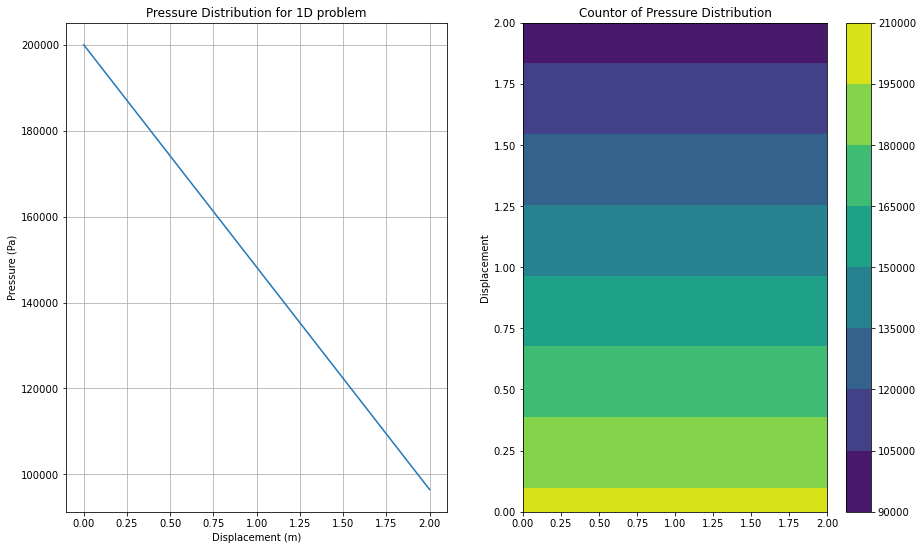

In [221]:
if Rec_Press_combobox.value == 'P1':
    if D_axis.value == 'x':
        Array_Pressure = np.linspace(P_0.value, int(Pressure1.args[1]), 50) 
        Array_Displacement = np.linspace(x0.value, x1.value, 50)
    elif D_axis.value == 'y':
        Array_Pressure = np.linspace(P_0.value, int(Pressure1.args[1]), 50) 
        Array_Displacement = np.linspace(y0.value, y1.value, 50)
    elif D_axis.value == 'z':
        Array_Pressure = np.linspace(P_0.value, int(Pressure1.args[1]), 50) 
        Array_Displacement = np.linspace(z0.value, z1.value, 50)
if Rec_Press_combobox.value == 'P0':
    if D_axis.value == 'x':
        Array_Pressure = np.linspace(int(Pressure1.args[1]), P_1.value, 50) 
        Array_Displacement = np.linspace(x0.value, x1.value, 50)
    elif D_axis.value == 'y':
        Array_Pressure = np.linspace(int(Pressure1.args[1]), P_1.value, 50) 
        Array_Displacement = np.linspace(y0.value, y1.value, 50)
    elif D_axis.value == 'z':
        Array_Pressure = np.linspace(int(Pressure1.args[1]), P_1.value, 50) 
        Array_Displacement = np.linspace(z0.value, z1.value, 50)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,9))
ax[0].plot(Array_Displacement, Array_Pressure)
ax[0].set_xlabel("Displacement (m)")
ax[0].set_ylabel("Pressure (Pa)")
ax[0].set_title("Pressure Distribution for 1D problem")
ax[0].grid()
Pressure_Matrix = np.repeat(Array_Pressure.reshape(50,1), 50, axis = 1)
Pressure_Contour = ax[1].contourf(Array_Displacement, Array_Displacement, Pressure_Matrix)
plt.colorbar(Pressure_Contour)
ax[1].set_title("Countor of Pressure Distribution")
ax[1].set_ylabel("Displacement")

## 2. Plotting the Velocity Distribution

Text(0, 0.5, 'Displacement')

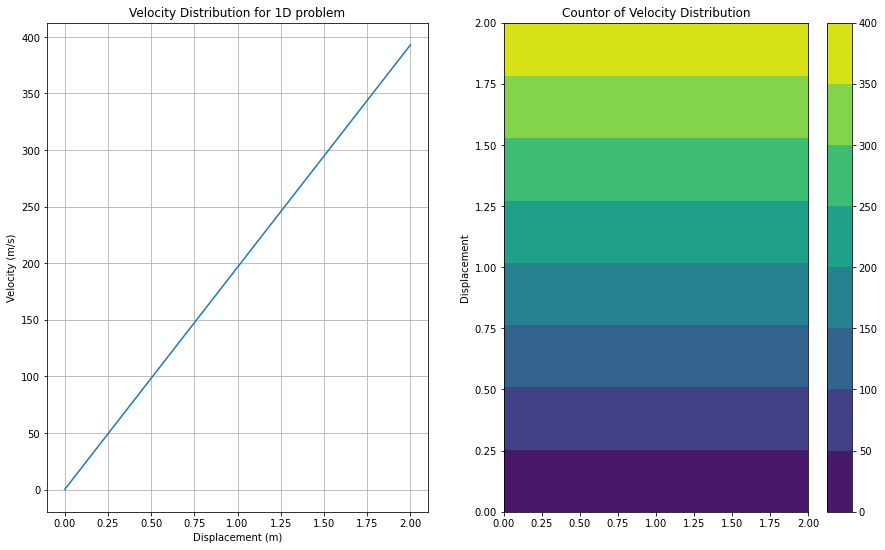

In [222]:
if Rec_Vel_combobox.value == 'V1':
    if D_axis.value == 'x':
        Array_Velocity = np.linspace(u0.value, int(Velocity1.args[1]), 50) 
        Array_Displacement = np.linspace(x0.value, x1.value, 50)
    elif D_axis.value == 'y':
        Array_Velocity = np.linspace(v0.value, int(Velocity1.args[1]), 50)
        Array_Displacement = np.linspace(y0.value, y1.value, 50)
    elif D_axis.value == 'z':
        Array_Velocity = np.linspace(w0.value, int(Velocity1.args[1]), 50)
        Array_Displacement = np.linspace(z0.value, z1.value, 50)
if Rec_Vel_combobox.value == 'V0':
    if D_axis.value == 'x':
        Array_Velocity = np.linspace(int(Velocity1.args[1]), u1.value, 50) 
        Array_Displacement = np.linspace(x0.value, x1.value, 50)
    elif D_axis.value == 'y':
        Array_Velocity = np.linspace(int(Velocity1.args[1]), v1.value, 50) 
        Array_Displacement = np.linspace(y0.value, y1.value, 50)
    elif D_axis.value == 'z':
        Array_Velocity = np.linspace(int(Velocity1.args[1]), w1.value, 50) 
        Array_Displacement = np.linspace(z0.value, z1.value, 50)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,9))
ax[0].plot(Array_Displacement, Array_Velocity)
ax[0].set_xlabel("Displacement (m)")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].set_title("Velocity Distribution for 1D problem")
ax[0].grid()
Velocity_Matrix = np.repeat(Array_Velocity.reshape(50,1), 50, axis = 1)
Velocity_Contour = ax[1].contourf(Array_Displacement, Array_Displacement, Velocity_Matrix)
plt.colorbar(Velocity_Contour)
ax[1].set_title("Countor of Velocity Distribution")
ax[1].set_ylabel("Displacement")

# Conclusion:

This miniproject is a simple idea about simple simulation in fluid mechanics.
It was my first steps in using Python, and it was a very amazing journey in which I was glad each time I added amazing options to my program.
However, this program is still weak and involves many flaws.
Also many advanced options would be added such as using matplotlib library to plot the contour of the required parameter (such as pressure) in a defined domain.
I will not stop during my dead time to develop this program because it is joyful to success to add amazing features.